In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from corner import corner
from matplotlib import pyplot as plt
from stellr import Optimizer

In [6]:
scale = 'DR14_ASPC'
path = f'stars_results/{scale}/'

opt = Optimizer()
opt.load_trace(os.path.join(path, 'trace'))

In [7]:
posterior = opt.trace.posterior
posterior

<xarray.Dataset>
Dimensions:                              (chain: 10, draw: 2000, stars/age_dim_0: 65, stars/dnu_dim_0: 65, stars/f_evol/__sigmoid_offset_dim_0: 65, stars/f_evol/offset_dim_0: 65, stars/f_evol_dim_0: 65, stars/log_age_dim_0: 65, stars/lum_dim_0: 65, stars/mass/__sigmoid_offset_dim_0: 65, stars/mass/offset_dim_0: 65, stars/mass_dim_0: 65, stars/mhi_dim_0: 65, stars/mhs_dim_0: 65, stars/mlt/__sigmoid_offset_dim_0: 65, stars/mlt/offset_dim_0: 65, stars/mlt_dim_0: 65, stars/rad_dim_0: 65, stars/teff_dim_0: 65, stars/yi/__sigmoid_offset_dim_0: 65, stars/yi/offset_dim_0: 65, stars/yi_dim_0: 65, stars/zi/__sigmoid_offset_dim_0: 65, stars/zi/offset_dim_0: 65, stars/zi_dim_0: 65)
Coordinates:
  * draw                                 (draw) int32 0 1 2 3 ... 1997 1998 1999
  * stars/f_evol/__sigmoid_offset_dim_0  (stars/f_evol/__sigmoid_offset_dim_0) int32 0 ... 64
  * stars/mass/__sigmoid_offset_dim_0    (stars/mass/__sigmoid_offset_dim_0) int32 0 ... 64
  * stars/mlt/__sigmoid_offset_dim_0     (stars/mlt/__sigmoid_offset_dim_0) int32 0 ... 64
  * stars/yi/__sigmoid_offset_dim_0      (stars/yi/__sigmoid_offset_dim_0) int32 0 ... 64
  * stars/zi/__sigmoid_offset_dim_0      (stars/zi/__sigmoid_offset_dim_0) int32 0 ... 64
  * stars/f_evol_dim_0                   (stars/f_evol_dim_0) int32 0 1 ... 64
  * stars/mass_dim_0                     (stars/mass_dim_0) int32 0 1 ... 63 64
  * stars/mlt_dim_0                      (stars/mlt_dim_0) int32 0 1 2 ... 63 64
  * stars/yi_dim_0                       (stars/yi_dim_0) int32 0 1 2 ... 63 64
  * stars/zi_dim_0                       (stars/zi_dim_0) int32 0 1 2 ... 63 64
  * stars/log_age_dim_0                  (stars/log_age_dim_0) int32 0 1 ... 64
  * stars/teff_dim_0                     (stars/teff_dim_0) int32 0 1 ... 63 64
  * stars/rad_dim_0                      (stars/rad_dim_0) int32 0 1 2 ... 63 64
  * stars/dnu_dim_0                      (stars/dnu_dim_0) int32 0 1 2 ... 63 64
  * stars/mhs_dim_0                      (stars/mhs_dim_0) int32 0 1 2 ... 63 64
  * stars/mhi_dim_0                      (stars/mhi_dim_0) int32 0 1 2 ... 63 64
  * stars/age_dim_0                      (stars/age_dim_0) int32 0 1 2 ... 63 64
  * stars/lum_dim_0                      (stars/lum_dim_0) int32 0 1 2 ... 63 64
  * stars/f_evol/offset_dim_0            (stars/f_evol/offset_dim_0) int32 0 ... 64
  * stars/mass/offset_dim_0              (stars/mass/offset_dim_0) int32 0 ... 64
  * stars/mlt/offset_dim_0               (stars/mlt/offset_dim_0) int32 0 ... 64
  * stars/yi/offset_dim_0                (stars/yi/offset_dim_0) int32 0 ... 64
  * stars/zi/offset_dim_0                (stars/zi/offset_dim_0) int32 0 ... 64
  * chain                                (chain) int32 0 1 2 3 4 5 6 7 8 9
Data variables:
    stars/f_evol/__sigmoid_offset        (chain, draw, stars/f_evol/__sigmoid_offset_dim_0) float32 ...
    stars/mass/__sigmoid_offset          (chain, draw, stars/mass/__sigmoid_offset_dim_0) float32 ...
    stars/mlt/__sigmoid_offset           (chain, draw, stars/mlt/__sigmoid_offset_dim_0) float32 ...
    stars/yi/__sigmoid_offset            (chain, draw, stars/yi/__sigmoid_offset_dim_0) float32 ...
    stars/zi/__sigmoid_offset            (chain, draw, stars/zi/__sigmoid_offset_dim_0) float32 ...
    stars/f_evol                         (chain, draw, stars/f_evol_dim_0) float32 ...
    stars/mass                           (chain, draw, stars/mass_dim_0) float32 ...
    stars/mlt                            (chain, draw, stars/mlt_dim_0) float32 ...
    stars/yi                             (chain, draw, stars/yi_dim_0) float32 ...
    stars/zi                             (chain, draw, stars/zi_dim_0) float32 ...
    stars/log_age                        (chain, draw, stars/log_age_dim_0) float32 ...
    stars/teff                           (chain, draw, stars/teff_dim_0) float32 ...
    stars/rad                            (chain, draw, stars/rad_dim_0) float32 ...
    stars/dnu          

In [8]:
stars = pd.read_csv(os.path.join(path, 'stars/results.csv'))
stars.head()

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hpd_3%,f_evol_hpd_97%,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,KIC5950854,0.763321,0.915235,1.046385,814.365176,807.303557,801.092467,2283.722583,0.665883,1.148091,...,16114.286060,16114.286060,12091.605099,-0.286714,-0.014441,0.000571,0.000404,-0.151989,1.000285,0.072446
1,KIC3942719,1.793372,1.842284,1.875486,1208.655610,1313.961699,1300.915979,4350.549601,1.745100,1.902267,...,4721.370081,4610.206042,5994.090706,-0.399115,-0.182095,0.000851,0.000609,-0.286317,1.001281,0.058497
2,KIC4457351,1.730574,1.791438,1.841019,1282.096402,1346.560937,1332.039675,3487.793276,1.684641,1.875507,...,18653.945354,16806.701632,12661.388740,-0.346223,-0.166987,0.000347,0.000258,-0.255532,1.000415,0.047389
3,KIC3223000,0.241799,0.427376,0.608999,1018.251812,1026.676044,1026.676044,1525.716817,0.117327,0.721454,...,11134.823647,11134.823647,12483.149321,-0.261360,-0.000487,0.000666,0.000471,-0.128199,1.000233,0.070297
4,KIC7429287,1.392368,1.515212,1.632316,920.639688,941.100703,926.034823,2818.445597,1.318749,1.697221,...,13411.201816,12436.152423,11806.379119,-0.416528,-0.157931,0.000604,0.000443,-0.284552,1.000286,0.069892


In [9]:
inputs = pd.read_csv(f'../../data/stellr/inputs_{scale}.csv')
inputs.head()

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,logg_err,bad_data,on_grid_1e,on_grid_2e
0,KIC5950854,5914.0347,134.60000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,0.009836,0,1,1
1,KIC7799349,4976.7870,82.60566,4.421854,0.138701,33.299,0.322,0.284619,0.029484,3.670984,0.007718,0,0,0
2,KIC5822889,5184.0103,94.43386,12.830989,0.707319,19.708,0.127,-0.026246,0.039186,3.401706,0.012167,0,0,0
3,KIC12069569,6062.4185,168.10576,7.144911,0.291244,44.687,2.162,-0.084244,0.066659,3.825712,0.060999,0,0,0
4,KIC6947945,5334.4380,103.46670,3.806103,0.153818,43.660,1.416,-0.041512,0.043107,3.794063,0.011004,0,0,0


In [10]:
stars = inputs.merge(stars, on='name')
stars.head()

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,KIC5950854,5914.0347,134.600000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,...,16114.286060,16114.286060,12091.605099,-0.286714,-0.014441,0.000571,0.000404,-0.151989,1.000285,0.072446
1,KIC3942719,5653.2954,126.502540,4.631670,0.202205,45.463,1.208,-0.314923,0.060012,3.838612,...,4721.370081,4610.206042,5994.090706,-0.399115,-0.182095,0.000851,0.000609,-0.286317,1.001281,0.058497
2,KIC4457351,5266.6953,100.036446,2.538945,0.095094,61.016,2.546,-0.279843,0.047070,3.964330,...,18653.945354,16806.701632,12661.388740,-0.346223,-0.166987,0.000347,0.000258,-0.255532,1.000415,0.047389
3,KIC3223000,5979.4927,136.427060,1.932630,0.086986,110.919,1.662,-0.152958,0.075412,4.365700,...,11134.823647,11134.823647,12483.149321,-0.261360,-0.000487,0.000666,0.000471,-0.128199,1.000233,0.070297
4,KIC7429287,5762.0845,133.098820,2.383776,0.079896,71.244,1.211,-0.305247,0.070656,4.076474,...,13411.201816,12436.152423,11806.379119,-0.416528,-0.157931,0.000604,0.000443,-0.284552,1.000286,0.069892


In [17]:
binary_ids = ['KIC9025370']
stars['binary'] = 0
stars.loc[stars['name'].isin(binary_ids), 'binary'] = 1

In [53]:
color = stars['binary']
color.loc[color==0] = 'C0'
color.loc[color==1] = 'C1'

def compare_model_obs(var):
    ax = stars.plot(
        kind='scatter', x=var, y=f'{var}_mean', c=color, alpha=0.8
    )
    ax.errorbar(stars[var], stars[f'{var}_mean'],
                xerr=stars[f'{var}_err'], yerr=stars[f'{var}_sd'],
                linestyle='none', linewidth=1.0, color='k', alpha=0.5, zorder=0)
    return ax
    

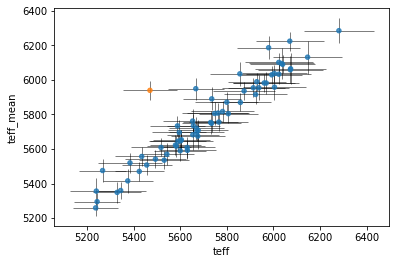

In [47]:
compare_model_obs('teff');

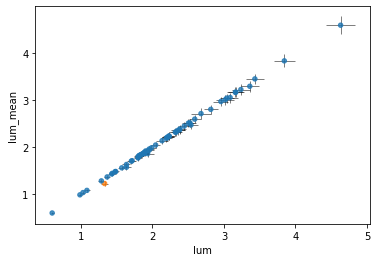

In [48]:
compare_model_obs('lum');

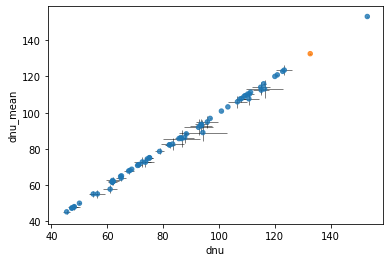

In [49]:
compare_model_obs('dnu');

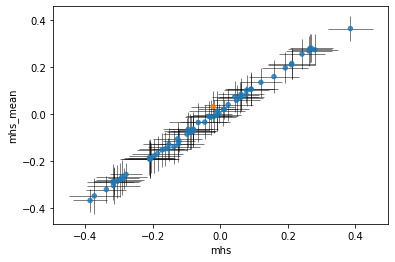

In [50]:
compare_model_obs('mhs');

<Figure size 1200x900 with 0 Axes>

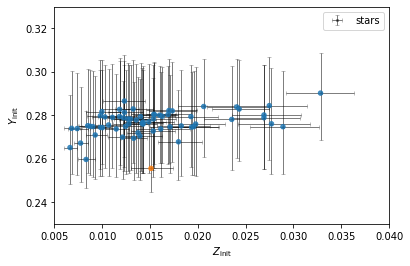

In [59]:
plt.figure(figsize=(4, 3), dpi=300)

ax = stars.plot(kind='scatter', x='zi_50th', y='yi_50th', c=color, alpha=0.8)
l_data = ax.errorbar(x=stars['zi_50th'], y=stars['yi_50th'],
             xerr=[stars['zi_50th']-stars['zi_16th'], stars['zi_84th']-stars['zi_50th']], 
             yerr=[stars['yi_50th']-stars['yi_16th'], stars['yi_84th']-stars['yi_50th']],
             linestyle='none', alpha=0.5, color='k',
             marker='s', markersize=2, elinewidth=1.0,
             capsize=2, label='stars', markeredgewidth=0.5,
             zorder=0
             )
plt.xlabel(r'$Z_\mathrm{init}$')
plt.ylabel(r'$Y_\mathrm{init}$')

plt.xlim(0.005, 0.04)
plt.ylim(0.23, 0.33)
plt.legend()

plt.savefig(os.path.join(path, 'zi_yi_results_plot.png'), tight_layout=True)

In [17]:
sstars = stars.sort_values('mlt_50th').reset_index(drop=True)
sstars.head()

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hpd_3%,f_evol_hpd_97%,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hpd_3%,mhs_hpd_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,KIC4457351,1.731630,1.791916,1.840246,1081.731991,1150.413251,1135.129553,2718.471084,1.687827,1.877502,...,19401.225612,17571.157359,13142.907627,-0.344418,-0.168758,0.000337,0.000250,-0.255048,1.000274,0.046896
1,KIC2991448,1.433997,1.612769,1.737118,828.138146,849.024877,835.158274,1943.540513,1.341644,1.809287,...,5264.347712,5264.347712,9254.216352,-0.128754,0.111502,0.000878,0.000621,-0.008529,1.001227,0.063681
2,KIC7376493,1.464880,1.579193,1.688465,1065.203883,1080.609089,1073.475677,2145.006287,1.402467,1.747350,...,32889.161849,19979.453598,14565.201721,-0.153736,0.018167,0.000252,0.000229,-0.068217,1.000754,0.045702
3,KIC8114155,1.170167,1.467853,1.647655,630.607685,629.474020,629.474020,500.123565,1.002201,1.752030,...,6413.655526,6043.989624,9253.000298,-0.022374,0.222867,0.000817,0.000595,0.100453,1.001240,0.065466
4,KIC4165030,1.706618,1.763405,1.810074,1061.832467,1093.769740,1084.960314,2792.153428,1.665929,1.837735,...,6906.015507,6253.136876,4486.929667,-0.458705,-0.272727,0.000593,0.000441,-0.366364,1.001791,0.049297


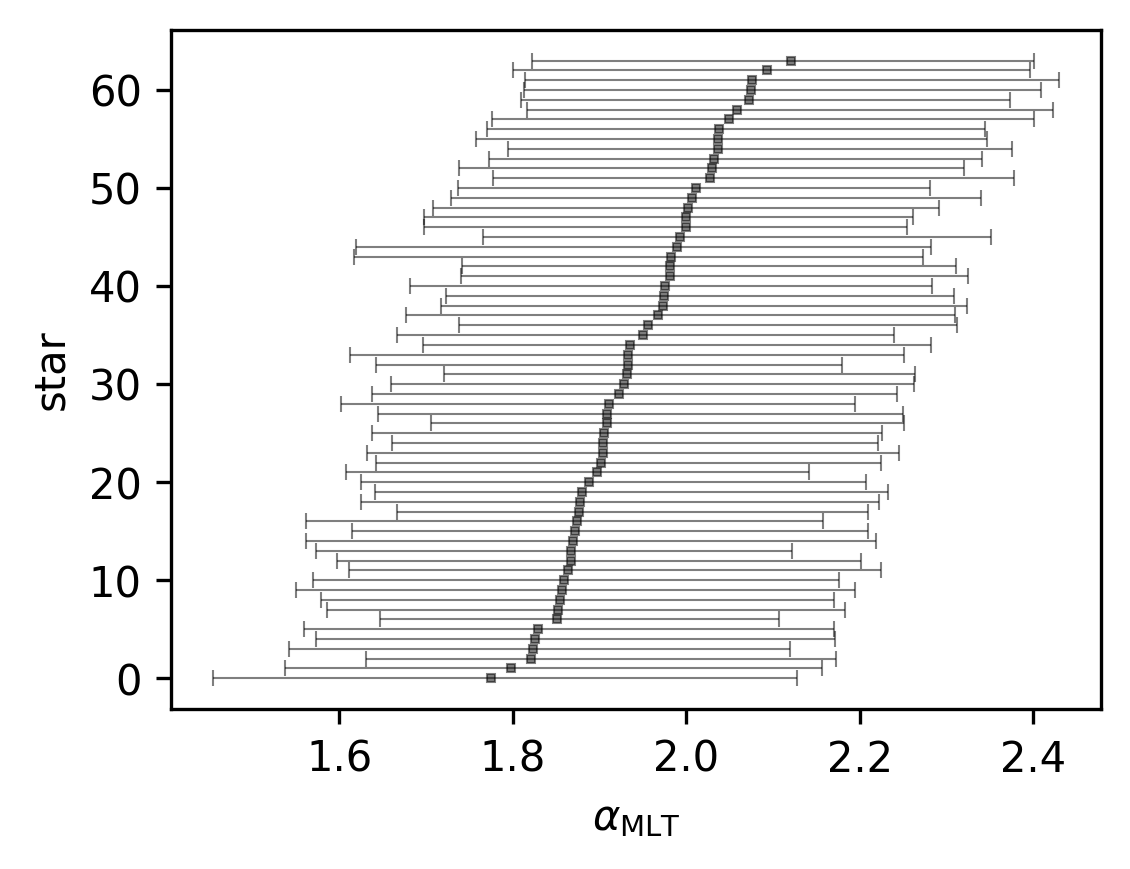

In [18]:
# ax = stars.plot(kind='hist', y='mlt_50%', histtype='step', density=True)
plt.figure(figsize=(4, 3), dpi=300)
# l0 = plt.plot(mlt, cdf.T, 'r', linewidth=1, alpha=0.2)
l1 = plt.errorbar(sstars['mlt_50th'], sstars.index, 
                 xerr=[stars['mlt_50th']-stars['mlt_16th'], stars['mlt_84th']-stars['mlt_50th']], 
             linestyle='none', alpha=0.5, color='k',
             marker='s', markersize=2, elinewidth=0.5,
             capsize=2, label='stars', markeredgewidth=0.5,)

plt.xlabel(r'$\alpha_\mathrm{MLT}$')
plt.ylabel('star')
# plt.xlim(*mlt_lim)
plt.savefig(os.path.join(path, 'mlt_results_plot.png'), tight_layout=True)

In [6]:
var_names = ['/'.join(['stars', name]) for name in ['yi', 'zi']]

yi_samples = posterior[var_names[0]].to_dataframe()
zi_samples = posterior[var_names[1]].to_dataframe()

In [7]:
xs = np.append(zi_samples.to_numpy(), yi_samples.to_numpy(), axis=1)
xs

array([[0.00986581, 0.25677845],
       [0.00661226, 0.31841907],
       [0.00805315, 0.27685213],
       ...,
       [0.00918235, 0.3180952 ],
       [0.01658099, 0.2712446 ],
       [0.00989228, 0.31862146]], dtype=float32)

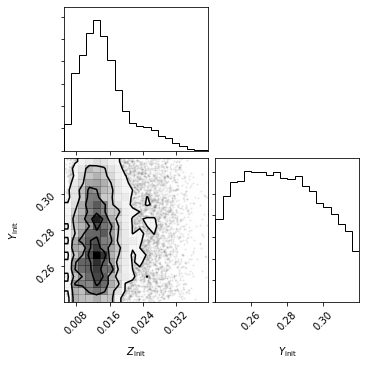

In [14]:
mask = np.random.choice(np.arange(xs.shape[0]), size=20000, replace=False)
fig = corner(xs[mask], labels=[r'$Z_\mathrm{init}$', r'$Y_\mathrm{init}$'])

ax = fig.axes[2]

fig.savefig(os.path.join(path, 'zi_yi_plot.png'), dpi=300, tight_layout=True)